<a href="https://colab.research.google.com/github/ZhangxjMia/Python/blob/main/Exploratory_Data_Analysis_(EDA)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries & dataset

In [20]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from google.colab import files
uploaded = files.upload()

Saving automobile.csv to automobile.csv


In [29]:
auto = pd.read_csv("automobile.csv")

# Basic Data Exploration
*   head of the dataset 
```
df.head() / df.sample()
```
*   the shape of the dataset
```
df.shape
```
*   info of the dataset
```
df.info()
```
*   summary of the dataset
```
# summary for numerical data
df.describe().T
# summary for categorical data
df['categorical_variable'].value_counts()
```







In [30]:
#It’s better to use .sample() than .head() if you don’t know how your data is sorted.
#auto.sample(5)
auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [31]:
auto.shape

(201, 29)

In [32]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [33]:
auto.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,201.0,0.840796,1.254802,-2.000000,0.000000,1.000000,2.000000,3.000000
normalized-losses,201.0,122.000000,31.996250,65.000000,101.000000,122.000000,137.000000,256.000000
wheel-base,201.0,98.797015,6.066366,86.600000,94.500000,97.000000,102.400000,120.900000
length,201.0,0.837102,0.059213,0.678039,0.801538,0.832292,0.881788,1.000000
width,201.0,0.915126,0.029187,0.837500,0.890278,0.909722,0.925000,1.000000
height,201.0,53.766667,2.447822,47.800000,52.000000,54.100000,55.500000,59.800000
curb-weight,201.0,2555.666667,517.296727,1488.000000,2169.000000,2414.000000,2926.000000,4066.000000
engine-size,201.0,126.875622,41.546834,61.000000,98.000000,120.000000,141.000000,326.000000
bore,201.0,3.330692,0.268072,2.540000,3.150000,3.310000,3.580000,3.940000
stroke,197.0,3.256904,0.319256,2.070000,3.110000,3.290000,3.410000,4.170000


## Data Types
*   'b' - boolean
*   'i' - (signed) integer
*   'u' - unsigned integer
*   'f' - floating-point
*   'c' - complex-floating point
*   'O' - (Python) objects
*   'S', 'a' - (byte-)string
*   'U' - Unicode
*   'V' - raw data (void)











In [34]:
for col in auto.columns:
  if auto[col].dtypes == 'O': 
    print(auto[col].value_counts())

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64
std      165
turbo     36
Name: aspiration, dtype: int64
four    115
two      86
Name: num-of-doors, dtype: int64
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
front    198
rear       3
Name: engine-location, dtype: int64
ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64
four      157
six        24
five       10
two         4
eight 

Text(0.5, 1.0, 'Frequency Distribution of Autos')

Text(0, 0.5, 'Number of Occurrences')

Text(0.5, 0, 'Autos')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

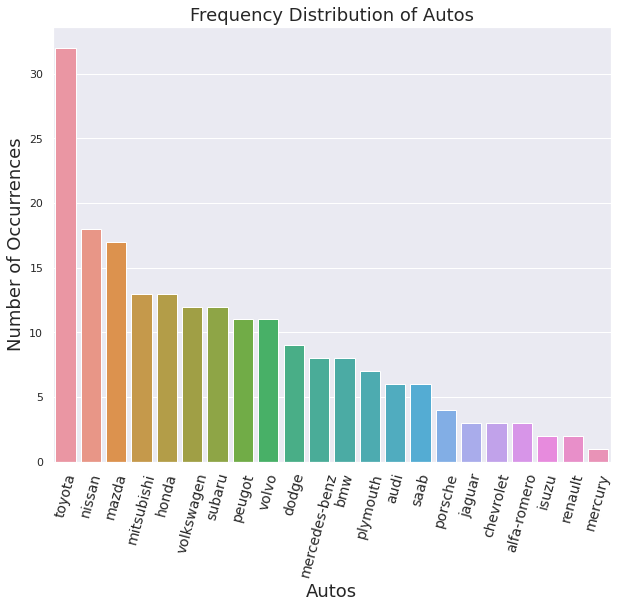

In [35]:
%matplotlib inline
auto_count = auto['make'].value_counts()
sns.set(style = 'darkgrid')
sns.barplot(auto_count.index, auto_count.values, alpha = 1)
plt.title('Frequency Distribution of Autos', fontsize=18)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('Autos', fontsize=18)
plt.xticks(fontsize=14, rotation = 75)
fig = plt.gcf()
fig.set_size_inches(10, 8)
#plt.grid()
plt.show()

# Exploratory Data Analysis (EDA)

*   Handle Missing Value
*   Removeing duplicates
*   Outlier Treatment
*   Normalizing & Scaling (Numerical Variables)
*   Encoding (Categorical, Dummy Variables)
*   Bivariate Analysis

## Handling Missing Value
*   Drop the missing values
> In this case, we drop the missing values from those 
variables. In case there are very few missing values you can drop those values.
```Python
dropna()
```
*   Impute with mean value
> For the numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn’t have extreme values .i.e. outliers.
```Python
fillna()
```
*   Impute with median value
> For the numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use the median approach.
*   Impute with mode value
> For the categorical column, you can replace the missing values with mode values i.e the frequent ones.





In [36]:
# Check for missing value in each column
auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

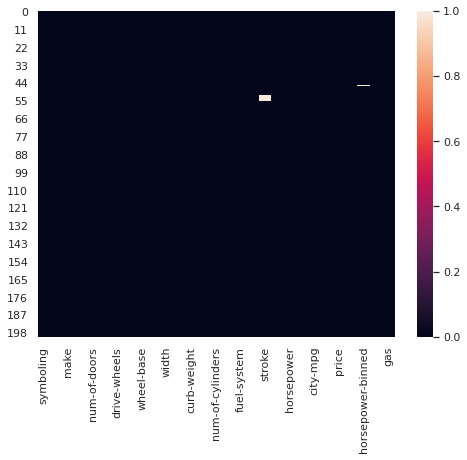

In [37]:
# using heatmap to detect missing values
sns.heatmap(auto.isnull())
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

## Bivariate Analysis
*   Numerical vs. Numerical
  1.   Scatterplot
  2.   Line plot
  3.   Heatmap for correlation
  4.   Joint plot
*   Categorical vs. Numerical
  1.   Bar chart
  2.   Voilin plot
  3.   Categorical box plot
  4.   Swarm plot
*   Categorical vs. Categorical
  1.   Bar Chart
  2.   Grouped bar chart
  3.   Point plot



### Correlations

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5]),
 <a list of 10 Text major ticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text major ticklabel objects>)

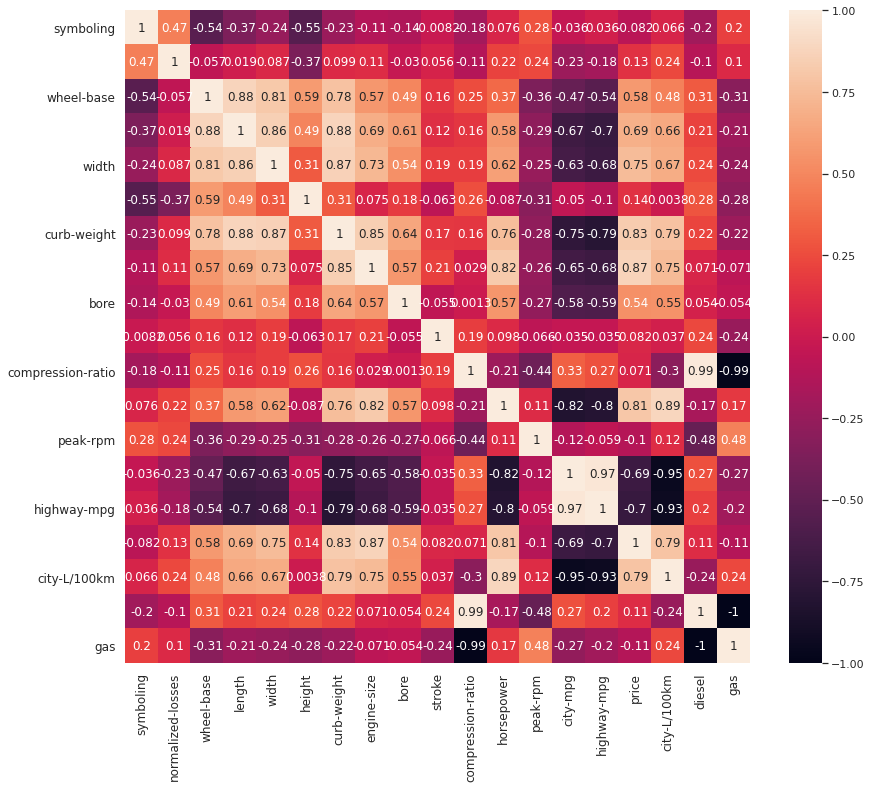

In [38]:
correlation_matrix = auto.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
fig = plt.gcf()
fig.set_size_inches(14, 12)
plt.show()

In [39]:
auto.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


### Line Chart

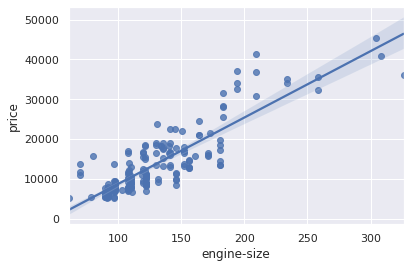

In [40]:
# Largest R^2: 0.87 (price and engine-size)
sns.regplot(x='engine-size',y='price',data=auto)

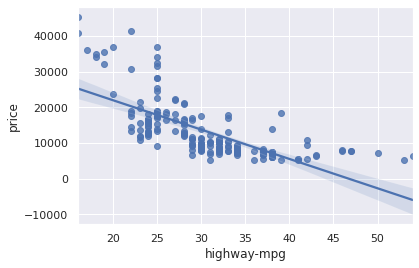

In [41]:
# Lowest R^2: -0.7 (price and highway-mpg)
sns.regplot(x='highway-mpg',y='price',data=auto)

### Histogram

In [42]:
mean_price = auto.groupby('make').mean()['price']
mean_price = pd.DataFrame(mean_price)
mean_price = mean_price.sort_values(by = ['price'])

Text(0.5, 1.0, 'Avg. Price for each Auto Brand')

Text(0, 0.5, 'Avg. of Price')

Text(0.5, 0, 'Auto Brand')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

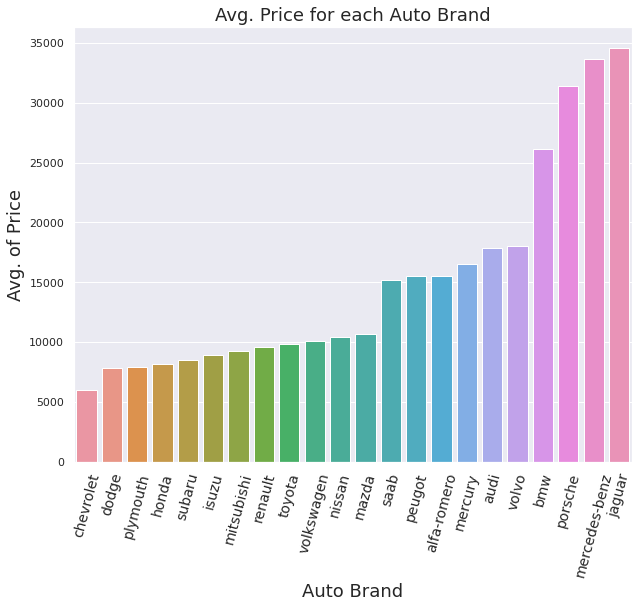

In [43]:
sns.set(style = 'darkgrid')
sns.barplot(mean_price.index, mean_price['price'], alpha = 1)
plt.title('Avg. Price for each Auto Brand', fontsize=18)
plt.ylabel('Avg. of Price', fontsize=18)
plt.xlabel('Auto Brand', fontsize=18)
plt.xticks(fontsize=14, rotation = 75)
fig = plt.gcf()
fig.set_size_inches(10, 8)
#plt.grid()
plt.show()

## Removeing duplicates

In [44]:
# detect duplicate data
duplicate = auto.duplicated()
duplicate.sum() # no duplicate data
auto[duplicate]

0

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas


In [45]:
# remove duplicate data
auto.drop_duplicates(inplace=True)

In [46]:
# check duplicate data again
duplicate.sum()

0

## Outlier Treatment

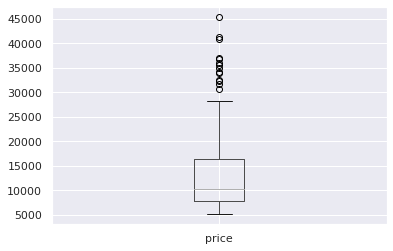

In [47]:
# generally identify outliers with the help of boxplot
auto.boxplot(column=['price'])
plt.show()


There are several ways of treating outliers:


*   Drop the outlier value
*   Replace the outlier value using the IQR





In [52]:
# def remove_outlier(col)
def remove_outlier(col):
  sorted(col)
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

In [53]:
low_price, upp_price = remove_outlier(auto['price'])
auto['price'] = np.where(auto['price'] > upp_price, upp_price, auto['price'])
auto['price'] = np.where(auto['price'] < low_price, low_price, auto['price'])

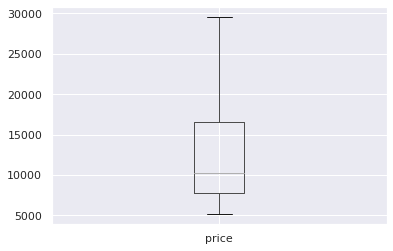

In [54]:
auto.boxplot(column=['price'])
plt.show()

## Normalizing & Scaling (Numerical Variables)

Scales the data, essentially returns the z-scores of every attribute.
z-score (also called a standard score) gives you an idea of how many of STD from the population mean.

In [60]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [64]:
auto[['length']] = scale.fit_transform(auto[['length']])
auto[['length']]

,length
0,-0.439409
1,-0.439409
2,-0.244152
3,0.195176
4,0.195176
...,...
196,1.187733
197,1.187733
198,1.187733
199,1.187733


In [65]:
for col in auto.columns:
  if auto[col].dtypes != 'O':
    auto[[col]] = scale.fit_transform(auto[[col]])
    print(auto[[col]])

     symboling
0     1.725050
1     1.725050
2     0.127193
3     0.926121
4     0.926121
..         ...
196  -1.470664
197  -1.470664
198  -1.470664
199  -1.470664
200  -1.470664

[201 rows x 1 columns]
     normalized-losses
0             0.000000
1             0.000000
2             0.000000
3             1.315931
4             1.315931
..                 ...
196          -0.845956
197          -0.845956
198          -0.845956
199          -0.845956
200          -0.845956

[201 rows x 1 columns]
     wheel-base
0     -1.685107
1     -1.685107
2     -0.710103
3      0.165748
4      0.099646
..          ...
196    1.702619
197    1.702619
198    1.702619
199    1.702619
200    1.702619

[201 rows x 1 columns]
       length
0   -0.439409
1   -0.439409
2   -0.244152
3    0.195176
4    0.195176
..        ...
196  1.187733
197  1.187733
198  1.187733
199  1.187733
200  1.187733

[201 rows x 1 columns]
        width
0   -0.853460
1   -0.853460
2   -0.185597
3    0.148335
4    0.243744
..  

## Encoding (Categorical, Dummy Variables)

In [68]:
for col in auto.columns:
  if auto[col].dtypes == 'O': 
    print(col)

make
aspiration
num-of-doors
body-style
drive-wheels
engine-location
engine-type
num-of-cylinders
fuel-system
horsepower-binned


In [71]:
dummies = pd.get_dummies(auto[['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'horsepower-binned']],
                         columns = ['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'horsepower-binned'],
                         drop_first = True)

In [72]:
dummies.head()

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower-binned_Low,horsepower-binned_Medium
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [74]:
columns = ['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'horsepower-binned']
auto = pd.concat([auto, dummies], axis = 1)
auto.drop(columns, axis = 1, inplace = True)

In [75]:
auto.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower-binned_Low,horsepower-binned_Medium
0,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.520966,-1.811627,-0.291435,0.203754,-0.246718,-0.652249,-0.542288,0.110215,0.492955,-0.332411,0.332411,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.520966,-1.811627,-0.291435,0.203754,-0.246718,-0.652249,-0.542288,0.562534,0.492955,-0.332411,0.332411,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.127193,0.000000,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,0.606234,-2.433363,0.669178,-0.291435,1.357416,-0.246718,-0.964397,-0.689386,0.562534,0.958861,-0.332411,0.332411,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.926121,1.315931,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.431327,-0.526138,0.449360,-0.041121,-0.037710,0.801670,-0.184027,-0.100993,0.178703,-0.060309,-0.332411,0.332411,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0.926121,1.315931,0.099646,0.195176,0.243744,0.218425,0.520017,0.220165,-0.526138,0.449360,-0.541748,0.311072,0.801670,-1.120471,-1.277779,0.705530,1.230640,-0.332411,0.332411,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
